In [1]:
# imports
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import sklearn.metrics as smetrics

import matplotlib.pyplot as plt

import utilities.data_utils as util
import utilities.ML_utilils as ml
import utilities.ryan_utils as rutils

[nltk_data] Downloading package stopwords to /Users/ryan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# importing data for SVR
df = pd.read_csv('data/downsampled_df.csv')
X_col = df['description'].tolist()
y_col = df['annual_salary'].tolist()

In [3]:
# reduce sample size due to quickly increasing training times (2 min for 1000 samples, 12 min for 2000 samples)
SAMPLES = 100 
# Applying some text pre-processing
X_processed = util.pre_process_descriptions(X_col)
X_bow_featurized = ml.featurize_bow(X_processed[0:SAMPLES]).toarray()
X_tfidf_featurized = ml.featurize_tfIDF(X_processed[0:SAMPLES], .25, 1).toarray()

y_featurized = y_col[0:SAMPLES]

In [4]:
# splitting the data for input into our model
TEST_SIZE = .2
X_BOW_train, X_BOW_test, y_train, y_test = train_test_split(X_bow_featurized, y_featurized, test_size=TEST_SIZE, random_state=42)
X_TFIDF_train, X_TFIDF_test, y_train, y_test = train_test_split(X_tfidf_featurized, y_featurized, test_size=TEST_SIZE, random_state=42)

In [5]:
#play around with C and Epsilon here - these are the hyperparameters to our model
C_VALUES = [1, 10, 100, 250, 500, 750, 1000, 2000, 3000, 4000, 5000]
EPSILON_CONSTANT = 1000

In [6]:
linear_BOW_preds = rutils.train_and_predict_SVR('linear', X_BOW_train, y_train, X_BOW_test, y_test)
poly_BOW_preds = rutils.train_and_predict_SVR('poly', X_BOW_train, y_train, X_BOW_test, y_test)
linear_TFIDF_preds = rutils.train_and_predict_SVR('linear', X_TFIDF_train, y_train, X_TFIDF_test, y_test)
poly_TFIDF_preds = rutils.train_and_predict_SVR('poly', X_TFIDF_train, y_train, X_TFIDF_test, y_test)

Mean Squared Error (MSE): 30771315.67635895
Mean Absolute Error: 4588.994831431277
Percent of postings predicted within $5,000:  45.00
Percent of postings predicted within $10,000:  100.00
Mean Squared Error (MSE): 29867772.502074845
Mean Absolute Error: 4449.680646613194
Percent of postings predicted within $5,000:  50.00
Percent of postings predicted within $10,000:  95.00
Mean Squared Error (MSE): 31179886.768082898
Mean Absolute Error: 4508.266091714013
Percent of postings predicted within $5,000:  65.00
Percent of postings predicted within $10,000:  90.00
Mean Squared Error (MSE): 31328616.78582149
Mean Absolute Error: 4526.478056417187
Percent of postings predicted within $5,000:  65.00
Percent of postings predicted within $10,000:  90.00
Mean Squared Error (MSE): 31328616.78582149
Mean Absolute Error: 4526.478056417187
Percent of postings predicted within $5,000:  65.00
Percent of postings predicted within $10,000:  90.00
Mean Squared Error (MSE): 31328616.78582149
Mean Absolute

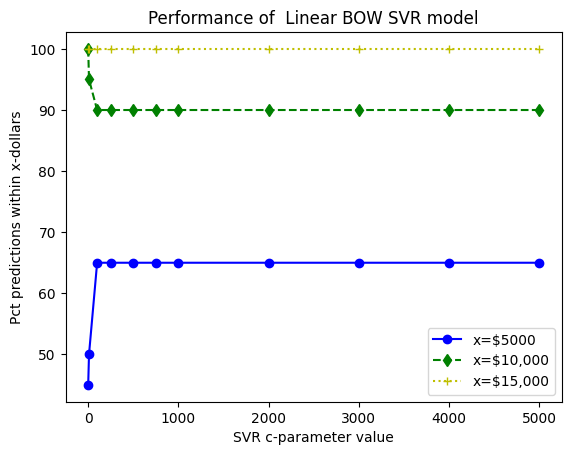

In [7]:
TITLE_PREFIX = 'Performance of '
model_name = ' Linear BOW SVR model'
rutils.graph_SVR_performance_by_C(TITLE_PREFIX+model_name, linear_BOW_preds, y_test, C_VALUES)


In [8]:
rutils.graph_SVR_performance_by_C(poly_BOW_preds, y_test, C_VALUES)

TypeError: graph_SVR_performance_by_C() missing 1 required positional argument: 'C_values'

In [ ]:
rutils.graph_SVR_performance_by_C(linear_TFIDF_preds, y_test, C_VALUES)

In [ ]:
rutils.graph_SVR_performance_by_C(poly_TFIDF_preds, y_test, C_VALUES)